## Boosting(1) - RamdomForestClassifier

In [4]:
#introduction to machinelearning with python p87 
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
#from sklearn.learning_curve import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve, auc

from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify = digits.target, random_state=0)

forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)
print(forest.get_params)
print("forest train score: {:.3f}".format(forest.score(X_train,y_train)))
print("forest test score: {:.3f}".format(forest.score(X_test,y_test)))
#print(forest.estimators_)

forest20 = RandomForestClassifier(n_estimators = 20, random_state = 0)
forest20.fit(X_train, y_train)
print("forest20 train score: {:.3f}".format(forest20.score(X_train,y_train)))
print("forest20 test score: {:.3f}".format(forest20.score(X_test,y_test)))
#print(forest20.estimators_)

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)>
forest train score: 1.000
forest test score: 0.982
forest20 train score: 1.000
forest20 test score: 0.973


In [33]:
print("-----------------------")
forest_final = RandomForestClassifier(n_estimators=20, random_state = 0, bootstrap= False, criterion = 'entropy',
                                             max_depth= 4, max_features = 7)
start = time()
forest_final.fit(X_train, y_train)
print("time took: %.3f seconds "%(time() - start))  #after fitting
print("RandomForest final score - training : {:.3f}".format(forest_final.score(X_train, y_train)))
print("RandomForest final score - test : {:.3f}".format(forest_final.score(X_test, y_test)))

-----------------------
time took: 0.049 seconds 
RandomForest final score - training : 0.944
RandomForest final score - test : 0.891


<module 'matplotlib.pyplot' from 'c:\\users\\nfleming\\appdata\\local\\programs\\python\\python37-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

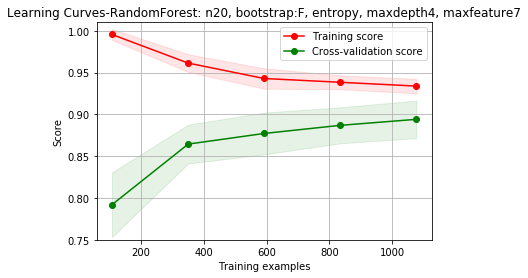

In [37]:
#learning curve
def plot_learning_curve (estimator, title, X,y, ylim = None, cv = None, 
                         n_jobs = None, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim (*ylim)
    plt.xlabel ("Training examples")
    plt.ylabel ("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1, color = "r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g", label = "Cross-validation score")
    plt.legend(loc ="best")
    return plt

X, y = X_train, y_train

title = "Learning Curves-RandomForest: n20, bootstrap:F, entropy, maxdepth4, maxfeature7"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = forest_final
plot_learning_curve(estimator, title, X, y, ylim = (0.75, 1.01), cv = cv, n_jobs = 4)

In [38]:
print("-----------------------")
forest_final = RandomForestClassifier(n_estimators=100, random_state = 0, criterion = 'gini',
                                             max_depth= 4, max_features = 4)
start = time()
forest_final.fit(X_train, y_train)
print("time took: %.3f seconds "%(time() - start))  #after fitting
print("RandomForest final score - training (tanh) : {:.3f}".format(forest_final.score(X_train, y_train)))
print("RandomForest final score - test (tanh) : {:.3f}".format(forest_final.score(X_test, y_test)))

-----------------------
time took: 0.117 seconds 
RandomForest final score - training (tanh) : 0.950
RandomForest final score - test (tanh) : 0.929


<module 'matplotlib.pyplot' from 'c:\\users\\nfleming\\appdata\\local\\programs\\python\\python37-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

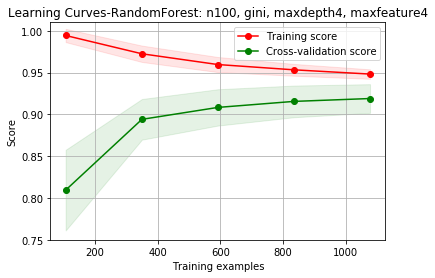

In [39]:
#learning curve
def plot_learning_curve (estimator, title, X,y, ylim = None, cv = None, 
                         n_jobs = None, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim (*ylim)
    plt.xlabel ("Training examples")
    plt.ylabel ("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1, color = "r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g", label = "Cross-validation score")
    plt.legend(loc ="best")
    return plt

X, y = X_train, y_train

title = "Learning Curves-RandomForest: n100, gini, maxdepth4, maxfeature4"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = forest_final
plot_learning_curve(estimator, title, X, y, ylim = (0.75, 1.01), cv = cv, n_jobs = 4)

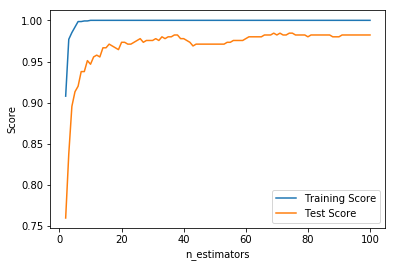

In [7]:
training_accuracy = []
test_accuracy = []
#try n_neighbors from 1 to 20
n_estimators = range(2,101)

for n_estimator in n_estimators:
    forest = RandomForestClassifier(n_estimators = n_estimator, random_state = 0)
    forest.fit(X_train, y_train)
    training_accuracy.append(forest.score(X_train, y_train))
    test_accuracy.append(forest.score(X_test, y_test))
    
plt.plot(n_estimators, training_accuracy, label = "Training Score")
plt.plot(n_estimators, test_accuracy, label = "Test Score")
plt.ylabel("Score")
plt.xlabel("n_estimators")
plt.legend()
plt.show() #going with 5

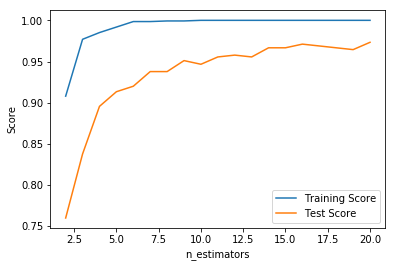

[0.9079435783221975, 0.9769858945805494, 0.9851521900519673, 0.991833704528582, 0.9985152190051967, 0.9985152190051967, 0.9992576095025983, 0.9992576095025983, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [8]:
training_accuracy = []
test_accuracy = []
#try n_neighbors from 1 to 20
n_estimators = range(2,21)

for n_estimator in n_estimators:
    #knclf = KNeighborsClassifier(n_neighbors = n_neighbors)
    forest = RandomForestClassifier(n_estimators = n_estimator, random_state = 0)
    forest.fit(X_train, y_train)
    training_accuracy.append(forest.score(X_train, y_train))
    test_accuracy.append(forest.score(X_test, y_test))
    
plt.plot(n_estimators, training_accuracy, label = "Training Score")
plt.plot(n_estimators, test_accuracy, label = "Test Score")
plt.ylabel("Score")
plt.xlabel("n_estimators")
plt.legend()

plt.show() # go with 9
print(training_accuracy)

### Grid Search

In [11]:
forest = RandomForestClassifier(n_estimators = 4, random_state = 0)
forest.fit(X_train, y_train)
X, y = X_train, y_train
#default - max_features; auto If “auto”, then max_features=sqrt(n_features). cancer['data'].shape: (569, 30) ~5-6
print("forest4 train score: {:.3f}".format(forest.score(X_train,y_train)))
print("forest4 test score: {:.3f}".format(forest.score(X_test,y_test)))

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")   
param_grid = {"max_depth": np.arange(1,5),
              "max_features": np.arange(1,11),     #[1,3,10],
              "min_samples_split": np.arange(2,6),    #[2,3,10],
              "bootstrap": [ True, False],
              "criterion":["gini", "entropy"]}

grid_search = GridSearchCV(forest, param_grid = param_grid, cv = 5)
start = time()
grid_search.fit(X_train, y_train)
print("***GridSearchCV took %.2f seconds for %d candidates parameter settings."
      %((time() - start), len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

"""print("----------------------")
        
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1,11),
              "min_samples_split": sp_randint (2,11),
              "bootstrap":[True, False],
              "criterion":["gini", "entropy"]}
n_iter_search = 20
random_search = RandomizedSearchCV(forest5, param_distributions = param_dist, n_iter = n_iter_search, cv = 5) #what's cv?
start = time()
random_search.fit(X_train, y_train)
print("***RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
      %((time() - start), n_iter_search))
report(random_search.cv_results_)
#print(random_search.cv_results_) """



forest4 train score: 0.985
forest4 test score: 0.896
***GridSearchCV took 25.02 seconds for 640 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.800 (std: 0.018)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 10, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.800 (std: 0.018)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 10, 'min_samples_split': 3}

Model with rank: 1
Mean validation score: 0.800 (std: 0.018)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 10, 'min_samples_split': 4}

Model with rank: 1
Mean validation score: 0.800 (std: 0.018)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 10, 'min_samples_split': 5}



c:\users\nfleming\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


'print("----------------------")\n        \nparam_dist = {"max_depth": [3, None],\n              "max_features": sp_randint(1,11),\n              "min_samples_split": sp_randint (2,11),\n              "bootstrap":[True, False],\n              "criterion":["gini", "entropy"]}\nn_iter_search = 20\nrandom_search = RandomizedSearchCV(forest5, param_distributions = param_dist, n_iter = n_iter_search, cv = 5) #what\'s cv?\nstart = time()\nrandom_search.fit(X_train, y_train)\nprint("***RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."\n      %((time() - start), n_iter_search))\nreport(random_search.cv_results_)\n#print(random_search.cv_results_) '

In [17]:
forest = RandomForestClassifier(n_estimators = 6, random_state = 0)
forest.fit(X_train, y_train)
X, y = X_train, y_train
#default - max_features; auto If “auto”, then max_features=sqrt(n_features). cancer['data'].shape: (569, 30) ~5-6
print("forest6 train score: {:.3f}".format(forest.score(X_train,y_train)))
print("forest6 test score: {:.3f}".format(forest.score(X_test,y_test)))

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")   
param_grid = {"max_depth": np.arange(1,5),
              "max_features": np.arange(1,11),     #[1,3,10],
              "min_samples_split": np.arange(2,6),    #[2,3,10],
              "bootstrap": [ True, False],
              "criterion":["gini", "entropy"]}

grid_search = GridSearchCV(forest, param_grid = param_grid, cv = 5)
start = time()
grid_search.fit(X_train, y_train)
print("***GridSearchCV took %.2f seconds for %d candidates parameter settings."
      %((time() - start), len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

"""print("----------------------")
        
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1,11),
              "min_samples_split": sp_randint (2,11),
              "bootstrap":[True, False],
              "criterion":["gini", "entropy"]}
n_iter_search = 20
random_search = RandomizedSearchCV(forest5, param_distributions = param_dist, n_iter = n_iter_search, cv = 5) #what's cv?
start = time()
random_search.fit(X_train, y_train)
print("***RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
      %((time() - start), n_iter_search))
report(random_search.cv_results_)
#print(random_search.cv_results_) """



forest6 train score: 0.999
forest6 test score: 0.920
***GridSearchCV took 36.85 seconds for 640 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.844 (std: 0.023)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 6, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.844 (std: 0.023)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 6, 'min_samples_split': 3}

Model with rank: 1
Mean validation score: 0.844 (std: 0.023)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 6, 'min_samples_split': 4}



c:\users\nfleming\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


'print("----------------------")\n        \nparam_dist = {"max_depth": [3, None],\n              "max_features": sp_randint(1,11),\n              "min_samples_split": sp_randint (2,11),\n              "bootstrap":[True, False],\n              "criterion":["gini", "entropy"]}\nn_iter_search = 20\nrandom_search = RandomizedSearchCV(forest5, param_distributions = param_dist, n_iter = n_iter_search, cv = 5) #what\'s cv?\nstart = time()\nrandom_search.fit(X_train, y_train)\nprint("***RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."\n      %((time() - start), n_iter_search))\nreport(random_search.cv_results_)\n#print(random_search.cv_results_) '

In [15]:
forest = RandomForestClassifier(n_estimators = 20, random_state = 0)
forest.fit(X_train, y_train)
X, y = X_train, y_train
#default - max_features; auto If “auto”, then max_features=sqrt(n_features). cancer['data'].shape: (569, 30) ~5-6
print("forest20 train score: {:.3f}".format(forest.score(X_train,y_train)))
print("forest20 test score: {:.3f}".format(forest.score(X_test,y_test)))

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")   
param_grid = {"max_depth": np.arange(1,5),
              "max_features": np.arange(1,11),     #[1,3,10],
              "min_samples_split": np.arange(2,6),    #[2,3,10],
              "bootstrap": [ True, False],
              "criterion":["gini", "entropy"]}

grid_search = GridSearchCV(forest, param_grid = param_grid, cv = 5)
start = time()
grid_search.fit(X_train, y_train)
print("***GridSearchCV took %.2f seconds for %d candidates parameter settings."
      %((time() - start), len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

"""print("----------------------")
        
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1,11),
              "min_samples_split": sp_randint (2,11),
              "bootstrap":[True, False],
              "criterion":["gini", "entropy"]}
n_iter_search = 20
random_search = RandomizedSearchCV(forest5, param_distributions = param_dist, n_iter = n_iter_search, cv = 5) #what's cv?
start = time()
random_search.fit(X_train, y_train)
print("***RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
      %((time() - start), n_iter_search))
report(random_search.cv_results_)
#print(random_search.cv_results_) """



forest20 train score: 1.000
forest20 test score: 0.973
***GridSearchCV took 96.95 seconds for 640 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.899 (std: 0.018)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 5, 'min_samples_split': 5}

Model with rank: 2
Mean validation score: 0.898 (std: 0.028)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 4, 'min_samples_split': 5}

Model with rank: 3
Mean validation score: 0.898 (std: 0.027)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 4, 'min_samples_split': 2}

Model with rank: 3
Mean validation score: 0.898 (std: 0.027)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 4, 'min_samples_split': 3}

Model with rank: 3
Mean validation score: 0.898 (std: 0.029)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 4, 'min_sampl

c:\users\nfleming\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


'print("----------------------")\n        \nparam_dist = {"max_depth": [3, None],\n              "max_features": sp_randint(1,11),\n              "min_samples_split": sp_randint (2,11),\n              "bootstrap":[True, False],\n              "criterion":["gini", "entropy"]}\nn_iter_search = 20\nrandom_search = RandomizedSearchCV(forest5, param_distributions = param_dist, n_iter = n_iter_search, cv = 5) #what\'s cv?\nstart = time()\nrandom_search.fit(X_train, y_train)\nprint("***RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."\n      %((time() - start), n_iter_search))\nreport(random_search.cv_results_)\n#print(random_search.cv_results_) '

In [13]:
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)
X, y = X_train, y_train
#default - max_features; auto If “auto”, then max_features=sqrt(n_features). cancer['data'].shape: (569, 30) ~5-6
print("forest100 train score: {:.3f}".format(forest.score(X_train,y_train)))
print("forest100 test score: {:.3f}".format(forest.score(X_test,y_test)))

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")   
param_grid = {"max_depth": np.arange(1,5),
              "max_features": np.arange(1,11),     #[1,3,10],
              "min_samples_split": np.arange(2,6),    #[2,3,10],
              "bootstrap": [ True, False],
              "criterion":["gini", "entropy"]}

grid_search = GridSearchCV(forest, param_grid = param_grid, cv = 5)
start = time()
grid_search.fit(X_train, y_train)
print("***GridSearchCV took %.2f seconds for %d candidates parameter settings."
      %((time() - start), len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

"""print("----------------------")
        
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1,11),
              "min_samples_split": sp_randint (2,11),
              "bootstrap":[True, False],
              "criterion":["gini", "entropy"]}
n_iter_search = 20
random_search = RandomizedSearchCV(forest5, param_distributions = param_dist, n_iter = n_iter_search, cv = 5) #what's cv?
start = time()
random_search.fit(X_train, y_train)
print("***RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
      %((time() - start), n_iter_search))
report(random_search.cv_results_)
#print(random_search.cv_results_) """



forest20 train score: 1.000
forest20 test score: 0.982
***GridSearchCV took 463.30 seconds for 640 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.925 (std: 0.013)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 4, 'min_samples_split': 3}

Model with rank: 1
Mean validation score: 0.925 (std: 0.017)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 4, 'min_samples_split': 4}

Model with rank: 3
Mean validation score: 0.924 (std: 0.015)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 4, 'min_samples_split': 2}



c:\users\nfleming\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


'print("----------------------")\n        \nparam_dist = {"max_depth": [3, None],\n              "max_features": sp_randint(1,11),\n              "min_samples_split": sp_randint (2,11),\n              "bootstrap":[True, False],\n              "criterion":["gini", "entropy"]}\nn_iter_search = 20\nrandom_search = RandomizedSearchCV(forest5, param_distributions = param_dist, n_iter = n_iter_search, cv = 5) #what\'s cv?\nstart = time()\nrandom_search.fit(X_train, y_train)\nprint("***RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."\n      %((time() - start), n_iter_search))\nreport(random_search.cv_results_)\n#print(random_search.cv_results_) '

### Validation Curve

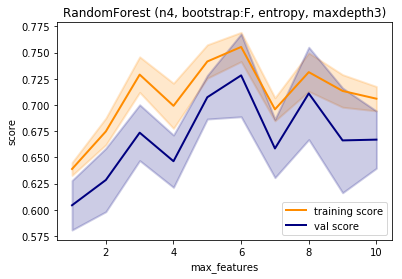

In [19]:
#validation curve
max_features = range(1,11)
training_score, val_score = validation_curve(RandomForestClassifier(n_estimators=4, random_state = 0, bootstrap= False, 
                                                                    criterion = 'entropy', max_depth= 3), 
                                             X_train, y_train,
                                             param_name = "max_features", 
                                             param_range = max_features, cv= 7)

## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("RandomForest (n4, bootstrap:F, entropy, maxdepth3)") 
plt.xlabel("max_features")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(max_features, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(max_features, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(max_features, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(max_features, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend(loc = 'lower right')
plt.show()   

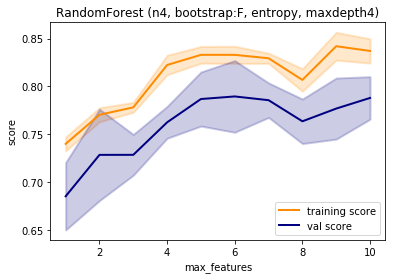

In [21]:
#validation curve
max_features = range(1,11)
training_score, val_score = validation_curve(RandomForestClassifier(n_estimators=4, random_state = 0, bootstrap= False, 
                                                                    criterion = 'entropy', max_depth= 4), 
                                             X_train, y_train,
                                             param_name = "max_features", 
                                             param_range = max_features, cv= 7)

## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("RandomForest (n4, bootstrap:F, entropy, maxdepth4)") 
plt.xlabel("max_features")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(max_features, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(max_features, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(max_features, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(max_features, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend(loc = 'lower right')
plt.show()   

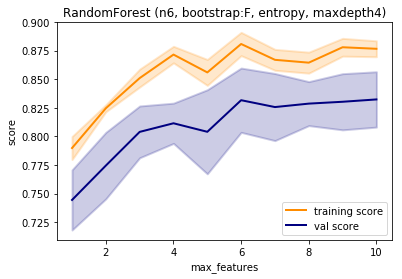

In [25]:
#validation curve
max_features = range(1,11)
training_score, val_score = validation_curve(RandomForestClassifier(n_estimators=6, random_state = 0, bootstrap= False, 
                                                                    criterion = 'entropy', max_depth= 4), 
                                             X_train, y_train,
                                             param_name = "max_features", 
                                             param_range = max_features, cv= 7)

## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("RandomForest (n6, bootstrap:F, entropy, maxdepth4)") 
plt.xlabel("max_features")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(max_features, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(max_features, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(max_features, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(max_features, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend(loc = 'lower right')
plt.show()   

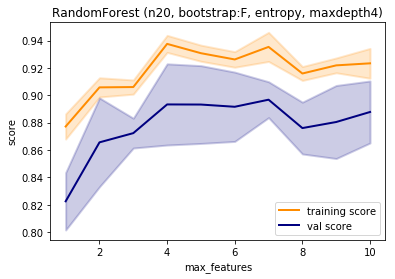

In [27]:
#validation curve
max_features = range(1,11)
training_score, val_score = validation_curve(RandomForestClassifier(n_estimators=20, random_state = 0, bootstrap= False, 
                                                                    criterion = 'entropy', max_depth= 4), 
                                             X_train, y_train,
                                             param_name = "max_features", 
                                             param_range = max_features, cv= 7)

## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("RandomForest (n20, bootstrap:F, entropy, maxdepth4)") 
plt.xlabel("max_features")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(max_features, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(max_features, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(max_features, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(max_features, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend(loc = 'lower right')
plt.show()   

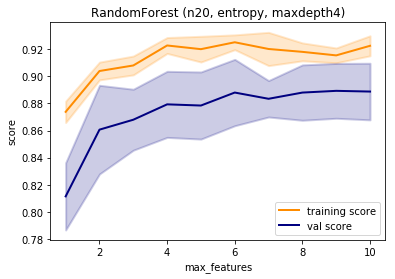

In [28]:
#validation curve
max_features = range(1,11)
training_score, val_score = validation_curve(RandomForestClassifier(n_estimators=20, random_state = 0, bootstrap= True, 
                                                                    criterion = 'entropy', max_depth= 4), 
                                             X_train, y_train,
                                             param_name = "max_features", 
                                             param_range = max_features, cv= 7)

## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("RandomForest (n20, entropy, maxdepth4)") 
plt.xlabel("max_features")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(max_features, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(max_features, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(max_features, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(max_features, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend(loc = 'lower right')
plt.show()   

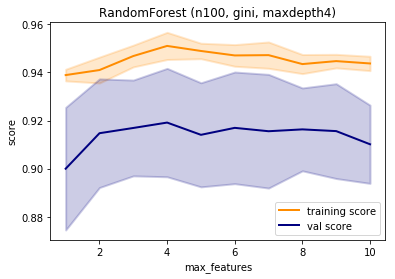

In [23]:
#validation curve
max_features = range(1,11)
training_score, val_score = validation_curve(RandomForestClassifier(n_estimators=100, random_state = 0,  
                                                                    criterion = 'gini', max_depth= 4), 
                                             X_train, y_train,
                                             param_name = "max_features", 
                                             param_range = max_features, cv= 7)

## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("RandomForest (n100, gini, maxdepth4)") 
plt.xlabel("max_features")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(max_features, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(max_features, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(max_features, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(max_features, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend(loc = 'lower right')
plt.show()   

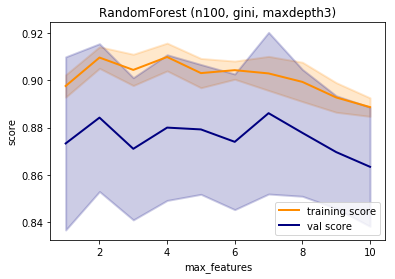

In [24]:
#validation curve
max_features = range(1,11)
training_score, val_score = validation_curve(RandomForestClassifier(n_estimators=100, random_state = 0,  
                                                                    criterion = 'gini', max_depth= 3), 
                                             X_train, y_train,
                                             param_name = "max_features", 
                                             param_range = max_features, cv= 7)

## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("RandomForest (n100, gini, maxdepth3)") 
plt.xlabel("max_features")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(max_features, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(max_features, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(max_features, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(max_features, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend(loc = 'lower right')
plt.show()   

In [ ]:
#validation curve
n_settings = range(1,21)
training_score, val_score = validation_curve(RandomForestClassifier(random_state = 0, bootstrap= True, criterion = 'entropy',
                                   max_depth= 3, max_features = 6, min_samples_split= 6), 
                                             X_train, y_train,
                                             param_name = "n_estimators", 
                                             param_range = n_settings, cv= 7)

## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("Validation Curve with RandomForest") 
plt.xlabel("n_estimators")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(n_settings, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(n_settings, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(n_settings, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(n_settings, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend(loc = 'lower right')
plt.show()   

In [ ]:
forest_maxd4 = RandomForestClassifier(n_estimators = 100, max_depth = 2,random_state = 0)
forest_maxd4.fit(X_train, y_train)
print("forest max depth 4 train score: {:.3f}".format(forest_maxd4.score(X_train,y_train)))
print("forest max depth 4 test score: {:.3f}".format(forest_maxd4.score(X_test,y_test)))

In [ ]:
forest5_ = RandomForestClassifier(n_estimators = 5, random_state = 0,max_depth= None, bootstrap= False, 
                                 criterion = 'entropy', max_features = 10, min_samples_split= 2 )
forest5_.fit(X_train, y_train)
print("forest5_ train score: {:.3f}".format(forest5_.score(X_train,y_train)))
print("forest5_ test score: {:.3f}".format(forest5_.score(X_test,y_test)))

In [ ]:
forest5_2 = RandomForestClassifier(n_estimators = 5, random_state = 0, bootstrap= True, criterion = 'gini',
                                   max_depth= 3, max_features = 9, min_samples_split= 6 )

#{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 6}

forest5_2.fit(X_train, y_train)
print("forest5_2 train score: {:.3f}".format(forest5_2.score(X_train,y_train)))
print("forest5_2 test score: {:.3f}".format(forest5_2.score(X_test,y_test)))

In [ ]:
training_accuracy = []
test_accuracy = []
#try n_neighbors from 1 to 20
n_estimators = range(2,20)

for n_estimator in n_estimators:
    #knclf = KNeighborsClassifier(n_neighbors = n_neighbors)
    forest = RandomForestClassifier(n_estimators = n_estimator, random_state = 0, bootstrap= True, criterion = 'gini',
                                   max_depth= 3, max_features = 6, min_samples_split= 6 )
    forest.fit(X_train, y_train)
    training_accuracy.append(forest.score(X_train, y_train))
    test_accuracy.append(forest.score(X_test, y_test))
    
plt.plot(n_estimators, training_accuracy, label = "Training Score")
plt.plot(n_estimators, test_accuracy, label = "Test Score")
plt.ylabel("Score")
plt.xlabel("n_estimators")
plt.legend()
plt.title("bootstrap= True, criterion = 'gini', max_depth= 3, max_features = 6, min_samples_split= 6")
plt.show()

In [ ]:
forest8_3 = RandomForestClassifier(n_estimators = 8, random_state = 0, bootstrap= True, criterion = 'gini',
                                   max_depth= 3, max_features = 6, min_samples_split= 6 )

#max_features to 6 from 9
#{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 6}  0.960 (std: 0.012)

forest8_3.fit(X_train, y_train)
print("forest8_3 train score: {:.3f}".format(forest8_3.score(X_train,y_train)))
print("forest8_3 test score: {:.3f}".format(forest8_3.score(X_test,y_test)))

In [ ]:
forest3_2 = RandomForestClassifier(n_estimators = 3, random_state = 0, bootstrap= True, criterion = 'gini',
                                   max_depth= 3, max_features = 9, min_samples_split= 6 )

#{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 6}

forest3_2.fit(X_train, y_train)
print("forest3_2 train score: {:.3f}".format(forest3_2.score(X_train,y_train)))
print("forest3_2 test score: {:.3f}".format(forest3_2.score(X_test,y_test)))

In [ ]:
training_accuracy = []
test_accuracy = []
#try n_neighbors from 1 to 20
n_estimators = range(2,20)

for n_estimator in n_estimators:
    #knclf = KNeighborsClassifier(n_neighbors = n_neighbors)
    forest = RandomForestClassifier(n_estimators = n_estimator, random_state = 0, bootstrap= True, criterion = 'gini',
                                   max_depth= 3, max_features = 9, min_samples_split= 6 )
    forest.fit(X_train, y_train)
    training_accuracy.append(forest.score(X_train, y_train))
    test_accuracy.append(forest.score(X_test, y_test))
    
plt.plot(n_estimators, training_accuracy, label = "Training Score")
plt.plot(n_estimators, test_accuracy, label = "Test Score")
plt.ylabel("Score")
plt.xlabel("n_estimators")
plt.legend()
plt.title("bootstrap= True, criterion = 'gini', max_depth= 3, max_features = 9, min_samples_split= 6")
plt.show()

In [ ]:
forest5_3 = RandomForestClassifier(n_estimators = 5, random_state = 0, bootstrap= True, criterion = 'gini',
                                   max_depth= 3, max_features = 6, min_samples_split= 6 )
#max_features to 6 from 9
#{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 6}  0.960 (std: 0.012)
forest5_3.fit(X_train, y_train)
print("forest5_3 train score: {:.3f}".format(forest5_3.score(X_train,y_train)))
print("forest5_3 test score: {:.3f}".format(forest5_3.score(X_test,y_test)))

In [ ]:
forest7_3 = RandomForestClassifier(n_estimators = 7, random_state = 0, bootstrap= True, criterion = 'gini',
                                   max_depth= 3, max_features = 6, min_samples_split= 6 )
#max_features to 6 from 9
#{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 6}  0.960 (std: 0.012)
forest7_3.fit(X_train, y_train)
print("forest7_3 train score: {:.3f}".format(forest7_3.score(X_train,y_train)))
print("forest7_3 test score: {:.3f}".format(forest7_3.score(X_test,y_test)))

In [ ]:
forest21_3 = RandomForestClassifier(n_estimators = 21, random_state = 0, bootstrap= True, criterion = 'gini',
                                   max_depth= 3, max_features = 6, min_samples_split= 6 )
#max_features to 6 from 9
#{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 6}  0.960 (std: 0.012)
forest21_3.fit(X_train, y_train)
print("forest21_3 train score: {:.3f}".format(forest21_3.score(X_train,y_train)))
print("forest21_3 test score: {:.3f}".format(forest21_3.score(X_test,y_test)))

In [ ]:
title = "Random Forest (n_estimators 21, bootstrap=T, gini, maxdepth3, maxfeatures6, min_samples_split6)"
#(n_estimators = 21, random_state = 0, bootstrap= True, criterion = 'gini', max_depth= 3, max_features = 6, min_samples_split= 6)
plot_feature_importances_cancer(forest21_3, title)

df = pd.DataFrame({'feature_names': cancer.feature_names, 'importance':forest21_3.feature_importances_})
print(df)

In [ ]:
#learning curve
#forest8_3 = RandomForestClassifier(n_estimators = 8, random_state = 0, bootstrap= True, criterion = 'gini',
#                                   max_depth= 3, max_features = 6, min_samples_split= 6 )
def plot_learning_curve (estimator, title, X,y, ylim = None, cv = None, 
                         n_jobs = None, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim (*ylim)
    plt.xlabel ("Training examples")
    plt.ylabel ("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1, color = "r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g", label = "Cross-validation score")
    plt.legend(loc ="best")
    return plt

X, y = X_train, y_train

title = "Learning Curves (RandomForest, 7 estimators)"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = forest7_3
plot_learning_curve(estimator, title, X, y, ylim = (0.8, 1.01), cv = cv, n_jobs = 4)

title = "Learning Curves (RandomForest, 8 estimators)"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = forest8_3
plot_learning_curve(estimator, title, X, y, ylim = (0.8, 1.01), cv = cv, n_jobs = 4)

title = "Learning Curves (RandomForest, 21 estimators)"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = forest21_3
plot_learning_curve(estimator, title, X, y, ylim = (0.8, 1.01), cv = cv, n_jobs = 4)

## Boosting(2) - GradientBoostingClassifier

In [ ]:
#default: 100 trees of maximum depth 3, learning rate: 0.1
#from sklearn.ensemble import GradientBoostingClassifier
#X_train, X_test, y_train, y_test = train_test_split (cancer.data, cancer.target, stratify = cancer.target, random_state = 0)
gbc = GradientBoostingClassifier(random_state = 0)
gbc.fit(X_train,y_train)
print("gbc train score: {:.3f}".format(gbc.score(X_train,y_train)))
print("gbc train score: {:.3f}".format(gbc.score(X_test,y_test)))

In [ ]:
gbc = GradientBoostingClassifier(random_state=0, max_depth = 1)
gbc.fit(X_train, y_train)
print("gbc train score: {:.3f}".format(gbc.score(X_train,y_train)))
print("gbc train score: {:.3f}".format(gbc.score(X_test,y_test)))

In [ ]:
gbc = GradientBoostingClassifier(random_state=0,  learning_rate = 0.01, verbose = 2)
gbc.fit(X_train, y_train)
print("gbc train score: {:.3f}".format(gbc.score(X_train,y_train)))
print("gbc train score: {:.3f}".format(gbc.score(X_test,y_test)))

In [ ]:
plot_feature_importances_cancer(gbc)

In [ ]:
#clf = ensemble.GradientBoostingClassifier(verbose=3) --time?
gbc = GradientBoostingClassifier(random_state=0,   verbose = 2, max_depth = 1)
gbc.fit(X_train, y_train)